# PyBer Analysis

## 1) Add dependencies

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

## 2) Convert CSV files to Pandas DataFrame

### Load and dataframe files

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Explore the data

#### Inspecting city data

In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data for all city types
city_type = city_data_df["type"].unique()
city_count = {"city_type":[],"count":[] }
for type in city_type:
    type_unique_count = sum(city_data_df["type"] == type)
    city_count["city_type"].append(type)
    city_count["count"].append(type_unique_count)
pd.DataFrame(city_count)
    

,city_type,count
0,Urban,66
1,Suburban,36
2,Rural,18


#### Inspecting Ride data

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

#### Merge Data Frames

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on =["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## 3) Create a Buble chart for the Ride-Sharing Data

### Create Dataframe for each type of city

In [15]:
print(city_type)

['Urban' 'Suburban' 'Rural']


In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
# Create the rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### Number of rides for each city type

In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

### Avearge fare for each city type

In [22]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

### Average number of drivers

In [25]:
# Get average number of drivers for each city in the urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get average number of drivers for each city in the suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
# Get average number of drivers for each city in the rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

### Create bubble chart

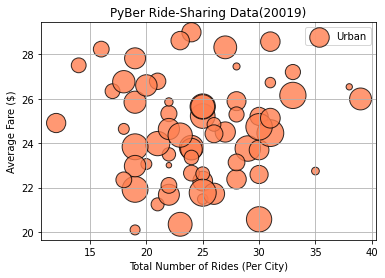

In [28]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10 * urban_driver_count,
            c = 'coral',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Urban'
           )
plt.title('PyBer Ride-Sharing Data(20019)')
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

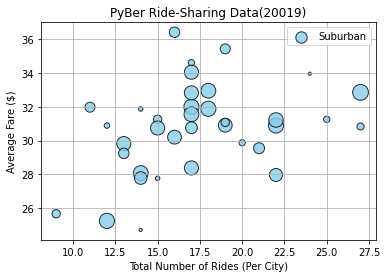

In [29]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            c = 'skyblue',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Suburban'
           )
plt.title('PyBer Ride-Sharing Data(20019)')
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

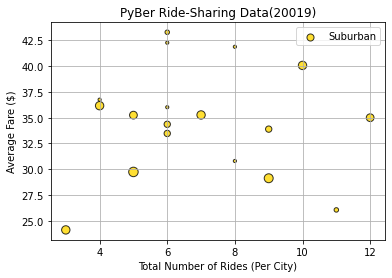

In [30]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10 * rural_driver_count,
            c = 'gold',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Suburban'
           )
plt.title('PyBer Ride-Sharing Data(20019)')
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

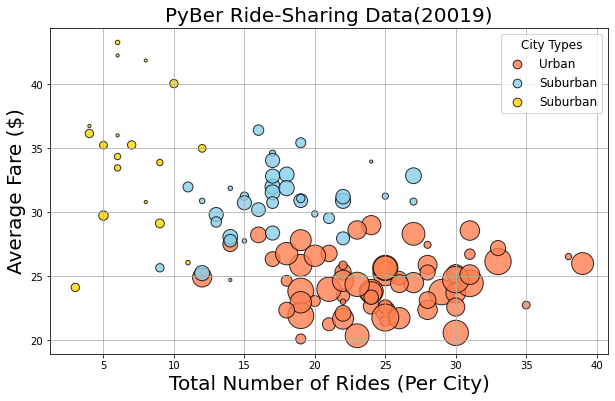

In [31]:
# Add the scatter charts for each type of city.
plt.subplots(figsize =(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10 * urban_driver_count,
            c = 'coral',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Urban'
           )
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            c = 'skyblue',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Suburban'
           )

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10 * rural_driver_count,
            c = 'gold',
            edgecolors= 'black',
            linewidths= 1,
            alpha = 0.8,
            label ='Suburban'
           )


plt.title('PyBer Ride-Sharing Data(20019)', fontsize = 20)
plt.ylabel("Average Fare ($)",fontsize = 20)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 20)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the plot
plt.show()

## 4) Summary Statistics

### Pandas describe()

In [32]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [35]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

### Pandas mean() median() mode()

In [38]:
# Calculate the mean of the ride count for each city type.
round (urban_ride_count.mean(),2), round (suburban_ride_count.mean(),2),round (rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
# Calculate the median of the ride count for each city type.
round (urban_ride_count.median(),2), round (suburban_ride_count.median(),2),round (rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
# Calculate the mode of the ride count for each city type.
round (urban_ride_count.mode(),2), round (suburban_ride_count.mode(),2),round (rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

### Numpy  and scipymeasures of central tendency

In [41]:
np.mean(urban_ride_count)# numpy pakage

24.62121212121212

In [42]:
np.median(urban_ride_count)# numpy package

24.0

In [43]:
sts.mode (urban_ride_count) #scipy package

ModeResult(mode=array([22]), count=array([7]))

In [44]:
sts.mode (suburban_ride_count) #scipy package

ModeResult(mode=array([17]), count=array([7]))

In [45]:
sts.mode (rural_ride_count) #scipy package

ModeResult(mode=array([6]), count=array([5]))

### Summary Statistics for the Fare by City Type

In [46]:
# ge fares for diffrent city type
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [47]:
print(np.mean(urban_fares)),
print(np.median(urban_fares)),
print(sts.mode(urban_fares))

24.52577230769236
24.64
ModeResult(mode=array([22.86]), count=array([5]))


In [48]:
print(np.mean(suburban_fares)),
print(np.median(suburban_fares)),
print(sts.mode(suburban_fares))

30.97012800000002
30.75
ModeResult(mode=array([17.99]), count=array([3]))


In [49]:
print(np.mean(rural_fares)),
print(np.median(rural_fares)),
print(sts.mode(rural_fares))

34.623440000000016
37.05
ModeResult(mode=array([37.05]), count=array([2]))


### Summary Statistics for the Number of Drivers by City Type

In [50]:
# Get the driver count data from the diffrent city type
urban_driver = urban_cities_df['driver_count']
suburban_driver = suburban_cities_df['driver_count']
rural_driver = rural_cities_df['driver_count']

In [51]:
print(np.mean(urban_driver)),
print(np.median(urban_driver)),
print(sts.mode(urban_driver))

36.67815384615385
37.0
ModeResult(mode=array([39]), count=array([86]))


In [52]:
print(np.mean(suburban_driver)),
print(np.median(suburban_driver)),
print(sts.mode(suburban_driver))

13.712
16.0
ModeResult(mode=array([20]), count=array([79]))


In [53]:
print(np.mean(rural_driver)),
print(np.median(rural_driver)),
print(sts.mode(rural_driver))

4.296
4.0
ModeResult(mode=array([1]), count=array([32]))


## Create Box-and-Whisker Plots

#### Ride count box plot

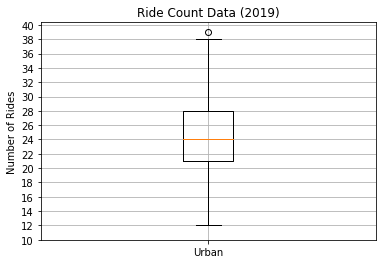

In [54]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots ()
ax.boxplot (urban_ride_count, labels =x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step =2.0))
ax.grid()
plt.show()

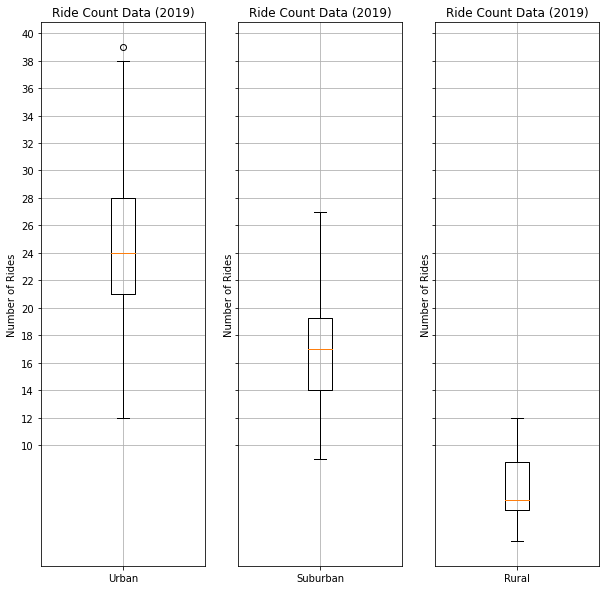

In [55]:
# Create a box-and-whisker plot for all cities ride count.
x_labels = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (10,10), sharey = True)
ax[0].boxplot (urban_ride_count, labels =[x_labels[0]])
ax[1].boxplot (suburban_ride_count, labels =[x_labels[1]])
ax[2].boxplot (rural_ride_count, labels =[x_labels[2]])

for i in [0,1,2]:
    ax[i].set_title("Ride Count Data (2019)")
    ax[i].set_ylabel("Number of Rides")
    ax[i].set_yticks(np.arange(10,41, step =2.0))
    ax[i].grid()
plt.show()

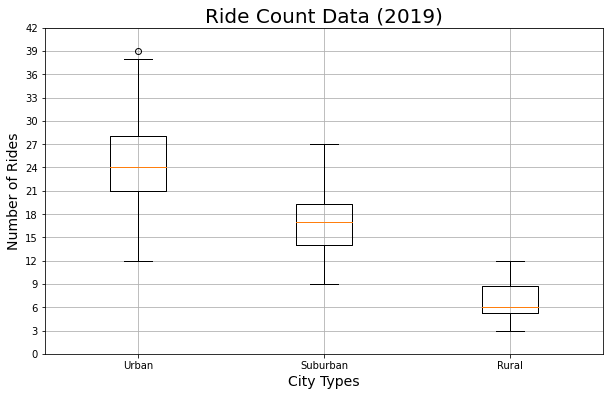

In [56]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

### Identifying outlier

In [57]:
urban_ride_count.dtypes

dtype('int64')

In [58]:
# Get the city that matches 39 (outlier)
outlier_ride_count = urban_ride_count[urban_ride_count==39].index[0]# urban_ride_count is a series
print(f"{outlier_ride_count} has the highest rider count in urban areas.")

West Angela has the highest rider count in urban areas.


#### Fares boxplot

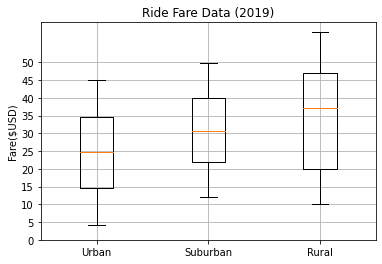

Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
---------------------
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
---------------------
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64
---------------------


In [59]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
for data in fare_data:
    print(f"{data.describe()}\n---------------------")

## Get the Percentage of Fares for Each City Type

In [76]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [77]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [78]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [79]:
# Calculate the percentage of fare for each city type.
type_percents_1 = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

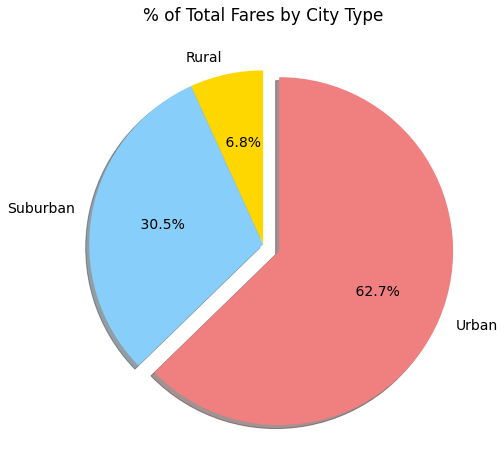

In [93]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl


# Build the percentage of fares by city type pie chart.
plt.subplots(figsize = (8,8))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],# or labels = pyber_data_df["type"].unique()
        colors = ["gold","lightskyblue", "lightcoral"],
        explode =[0,0,0.1],
        autopct= '% 1.1f%%',
        shadow= True,
        startangle= 90
       )
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

plt.show()


## Calculate Ride Percentages

In [95]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [107]:
ride_percents = 100 * pyber_data_df.groupby('type').count()['ride_id'] / pyber_data_df['ride_id'].count()

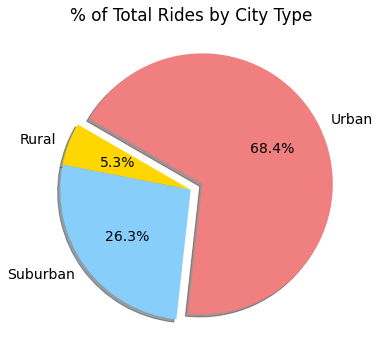

In [109]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150
       )
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

## Calculate Driver Percentage

In [115]:
driver_percents = 100 * city_data_df.groupby('type').sum()['driver_count'] / city_data_df['driver_count'].sum()

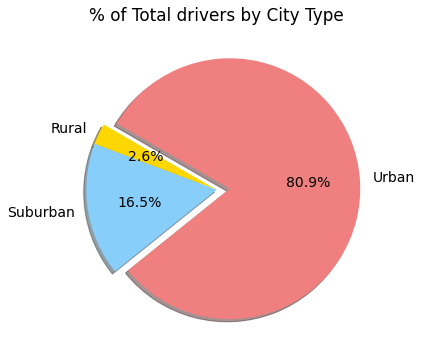

In [116]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150
       )
plt.title("% of Total drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()